# Import libraries and Data

In [1]:
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
df = pd.read_csv('player_season_preprocessed.csv')

In [3]:
df.head()

,player_id,Season,Age,Competition,Club,club_id,position_group,New_season,Squad,Appearances,...,Own goals,Assists,Penalty goals,Yellow cards,Second yellow cards,Red cards,Substitutions on,Substitutions off,Minutes played,Minutes per goal
0,2857,17/18,32,Premier League,Leicester City,1003,Goalkeeper,False,10,2,...,0,0,0,0,0,0,0,0,180,0
1,16911,17/18,30,Premier League,Leicester City,1003,Goalkeeper,False,33,33,...,1,0,0,3,0,0,0,1,2966,0
2,56810,17/18,28,Premier League,Leicester City,1003,midfield,False,15,12,...,0,1,0,3,0,0,3,4,761,0
3,61560,17/18,27,Premier League,Leicester City,1003,midfield,False,35,34,...,0,7,0,5,0,1,4,10,2543,1272
4,65467,17/18,29,Premier League,Leicester City,1003,midfield,False,29,19,...,0,0,0,0,0,0,2,7,1414,471


## We need season performance of players who have played

In [ ]:
df.drop(df[df.Appearances == 0].index, inplace=True)

# Defining Metrics

## Group positions

In [4]:
df.columns

Index(['player_id', 'Season', 'Age', 'Competition', 'Club', 'club_id',
       'position_group', 'New_season', 'Squad', 'Appearances',
       'club_clean_sheet', 'player_clean_sheet', 'Goals conceded', 'PPG',
       'Goals', 'Own goals', 'Assists', 'Penalty goals', 'Yellow cards',
       'Second yellow cards', 'Red cards', 'Substitutions on',
       'Substitutions off', 'Minutes played', 'Minutes per goal'],
      dtype='object')

[Text(0, 0, '1940'), Text(0, 0, '2511'), Text(0, 0, '794'), Text(0, 0, '2187')]

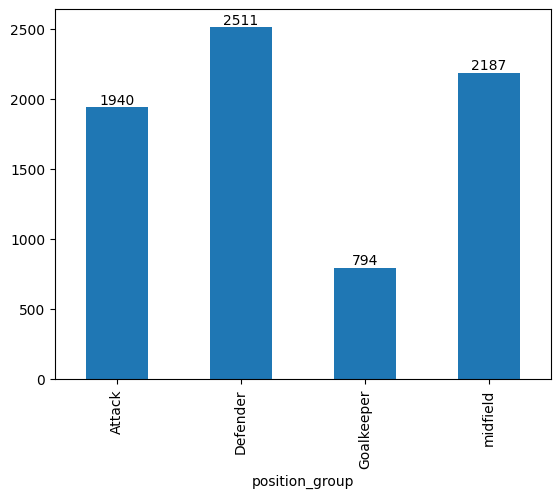

In [5]:
ax1 = df.groupby('position_group').player_id.count().plot(kind='bar')
ax1.bar_label(ax1.containers[0])

## Metric for each group position

In [8]:
metric_score=[]
for index,record in df.iterrows():
    if record['position_group'] == 'Attack':
        Appearances = record['Appearances']
        goal = record['Goals']
        Assist= record['Assists']
        ppg = record['PPG'] # teammate_score
        forward_metric=(3*goal+Assist)/Appearances + ppg 
        Minutes= record['Minutes played']
        if Minutes >= 100:
            increment = Minutes // 100 # experience_score
            forward_metric += increment+1
        metric_score.append(forward_metric)

    elif record['position_group'] =='Goalkeeper':
        clean_sheet= record['player_clean_sheet']
        goal_coneded= record['Goals conceded']
        own_goal = record['Own goals']
        Appearances = record['Appearances']
        ppg = record['PPG'] # teammate_score
        Goalkeeper_metric= (3*clean_sheet - goal_coneded - 2*own_goal)/Appearances + ppg
        Minutes= record['Minutes played']
        if Minutes >= 100:
            increment = Minutes // 100 # experience_score
            Goalkeeper_metric += increment+1
        metric_score.append(Goalkeeper_metric)


    elif record['position_group'] == 'Defender':
        team_cleansheet = record['club_clean_sheet']   
        red_card=int(record['Red cards'])
        Minutes= record['Minutes played']
        own_goal = record['Own goals']
        Appearances = record['Appearances']
        ppg = record['PPG'] # teammate_score
        Defender_metric=(2*team_cleansheet-red_card -own_goal)/Appearances + ppg
        if Minutes >= 100:
            increment = Minutes // 100 # experience_score
            Defender_metric += increment+1
        metric_score.append(Defender_metric)

    elif record['position_group'] == 'midfield':
        goal= record['Goals']
        red_card= record['Red cards']
        Assist= record['Assists']
        Appearances = record['Appearances']
        ppg = record['PPG'] # teammate_score
        midfield_metric=((goal+Assist)*3-red_card)/Appearances + ppg
        Minutes= record['Minutes played']
        if Minutes >= 100:
            increment = Minutes // 100 # experience_score
            midfield_metric += increment+1
        metric_score.append(midfield_metric)    
    else:
         metric_score.append(0)   

df['perf_score'] = metric_score

Text(0.5, 1.0, 'Performance score before normalization')

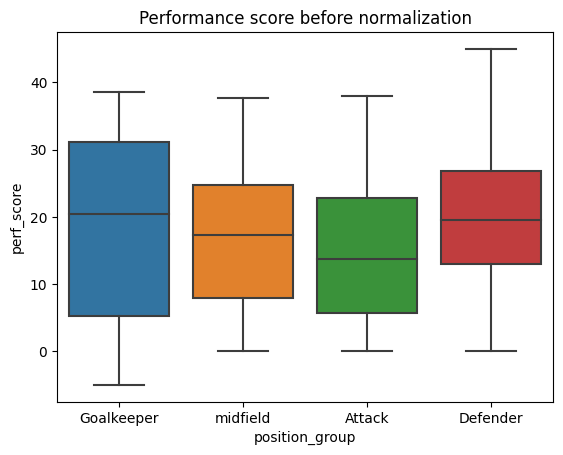

In [9]:
fig2 , ax2 = plt.subplots()
sns.boxplot(data=df, x='position_group', y='perf_score', ax=ax2)
ax2.set_title('Performance score before normalization')

## Normilizing metrics for each position

In [10]:
def normalize(arr):
    max = np.max(arr)
    min = np.min(arr)
    Q = 100
    return (arr - min)/(max - min) * Q

In [11]:
df.loc[df[df.position_group == 'Attack'].index, 'perf_score'] = normalize(df[df.position_group == 'Attack'].perf_score)
df.loc[df[df.position_group == 'Goalkeeper'].index, 'perf_score'] = normalize(df[df.position_group == 'Goalkeeper'].perf_score)
df.loc[df[df.position_group == 'Defender'].index, 'perf_score'] = normalize(df[df.position_group == 'Defender'].perf_score)
df.loc[df[df.position_group == 'midfield'].index, 'perf_score'] = normalize(df[df.position_group == 'midfield'].perf_score)

Text(0.5, 1.0, 'Performance score after normalization')

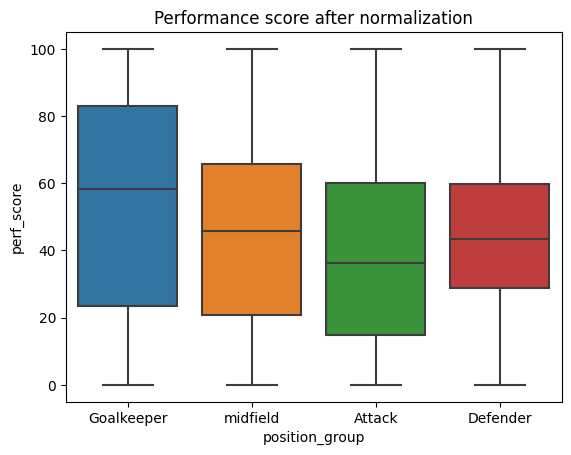

In [12]:
fig3 , ax3 = plt.subplots()
sns.boxplot(data=df, x='position_group', y='perf_score', ax=ax3)
ax3.set_title('Performance score after normalization')

In [13]:
fig2.savefig('metric_before_normalization.png')
fig3.savefig('metric_after_normalization.png')

# Run Test

## Split Groups

In [14]:
df.columns

Index(['player_id', 'Season', 'Age', 'Competition', 'Club', 'club_id',
       'position_group', 'New_season', 'Squad', 'Appearances',
       'club_clean_sheet', 'player_clean_sheet', 'Goals conceded', 'PPG',
       'Goals', 'Own goals', 'Assists', 'Penalty goals', 'Yellow cards',
       'Second yellow cards', 'Red cards', 'Substitutions on',
       'Substitutions off', 'Minutes played', 'Minutes per goal',
       'perf_score'],
      dtype='object')

In [39]:
selectd_df = df[df.New_season == True]

In [40]:
group1 = selectd_df[selectd_df.Age >= 30].perf_score.sort_values()
group2 = selectd_df[selectd_df.Age < 30].perf_score.sort_values()

## Run two-sample t-test

In [41]:
t_statistic, p_value = stats.ttest_ind(group1, group2, equal_var=False)

print("t-statistic:", t_statistic)
print("p-value:", p_value)

diff_ratio = (1-p_value)*100

t-statistic: -0.5739497581767877
p-value: 0.5667495513548018


In [42]:
print('As', diff_ratio, 'percent, performance of two groups are different.')


As 43.325044864519825 percent, performance of two groups are different.


## Plot and compare normal distribution

Text(0.5, 0, 'As 43.33 percent, The performance difference between the two groups is not significant.')

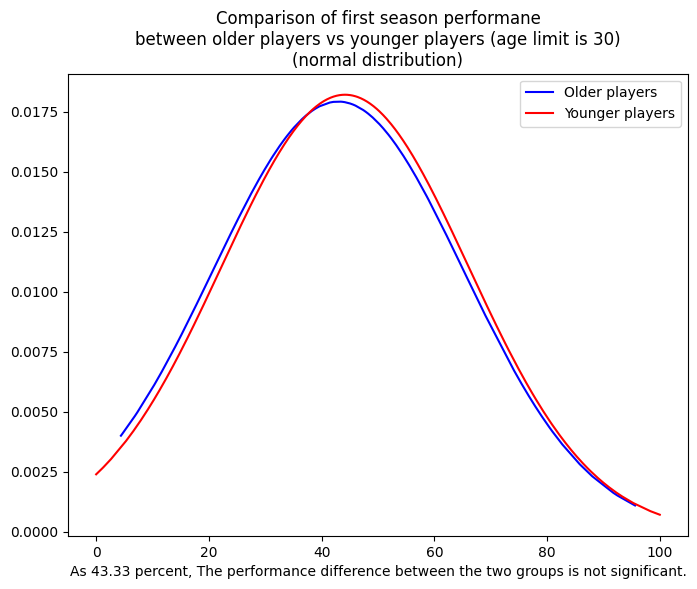

In [78]:
fig3, ax3 = plt.subplots(figsize = (8,6))
p1 = stats.norm.pdf(group1, np.mean(group1), np.std(group1))
p2 = stats.norm.pdf(group2, np.mean(group2), np.std(group2))
ax3.plot(group1, p1, 'b', label = 'Older players')
ax3.plot(group2, p2, 'r', label = 'Younger players')
ax3.set_title('Comparison of first season performane\nbetween older players vs younger players (age limit is 30)\n(normal distribution)')
ax3.legend()
ax3.set_xlabel('As '+ str(round(diff_ratio,2)) +' percent, The performance difference between the two groups is not significant.')

In [44]:
fig3.savefig('hypothesis1_result.png')

# Run Test for each postition

In [45]:
selectd_df.position_group.unique()

array(['Attack', 'Defender', 'midfield', 'Goalkeeper'], dtype=object)

In [62]:
group1_gk = selectd_df[(selectd_df.Age >= 30) & (selectd_df.position_group == 'Goalkeeper')].perf_score.sort_values()
group2_gk = selectd_df[(selectd_df.Age < 30) & (selectd_df.position_group == 'Goalkeeper')].perf_score.sort_values()

group1_at = selectd_df[(selectd_df.Age >= 30) & (selectd_df.position_group == 'Attack')].perf_score.sort_values()
group2_at = selectd_df[(selectd_df.Age < 30) & (selectd_df.position_group == 'Attack')].perf_score.sort_values()

group1_df = selectd_df[(selectd_df.Age >= 30) & (selectd_df.position_group == 'Defender')].perf_score.sort_values()
group2_df = selectd_df[(selectd_df.Age < 30) & (selectd_df.position_group == 'Defender')].perf_score.sort_values()

group1_mf = selectd_df[(selectd_df.Age >= 30) & (selectd_df.position_group == 'midfield')].perf_score.sort_values()
group2_mf = selectd_df[(selectd_df.Age < 30) & (selectd_df.position_group == 'midfield')].perf_score.sort_values()

In [74]:
t_statistic_gk, p_value_gk = stats.ttest_ind(group1_gk, group2_gk, equal_var=False)
t_statistic_at, p_value_at = stats.ttest_ind(group1_at, group2_at, equal_var=False)
t_statistic_df, p_value_df = stats.ttest_ind(group1_df, group2_df, equal_var=False)
t_statistic_mf, p_value_mf = stats.ttest_ind(group1_mf, group2_mf, equal_var=False)

diff_ratio_gk = (1-p_value_gk)*100
diff_ratio_at = (1-p_value_at)*100
diff_ratio_df = (1-p_value_df)*100
diff_ratio_mf = (1-p_value_mf)*100

Text(0.5, 0, 'As 14.99 percent, The performance difference is not significant.')

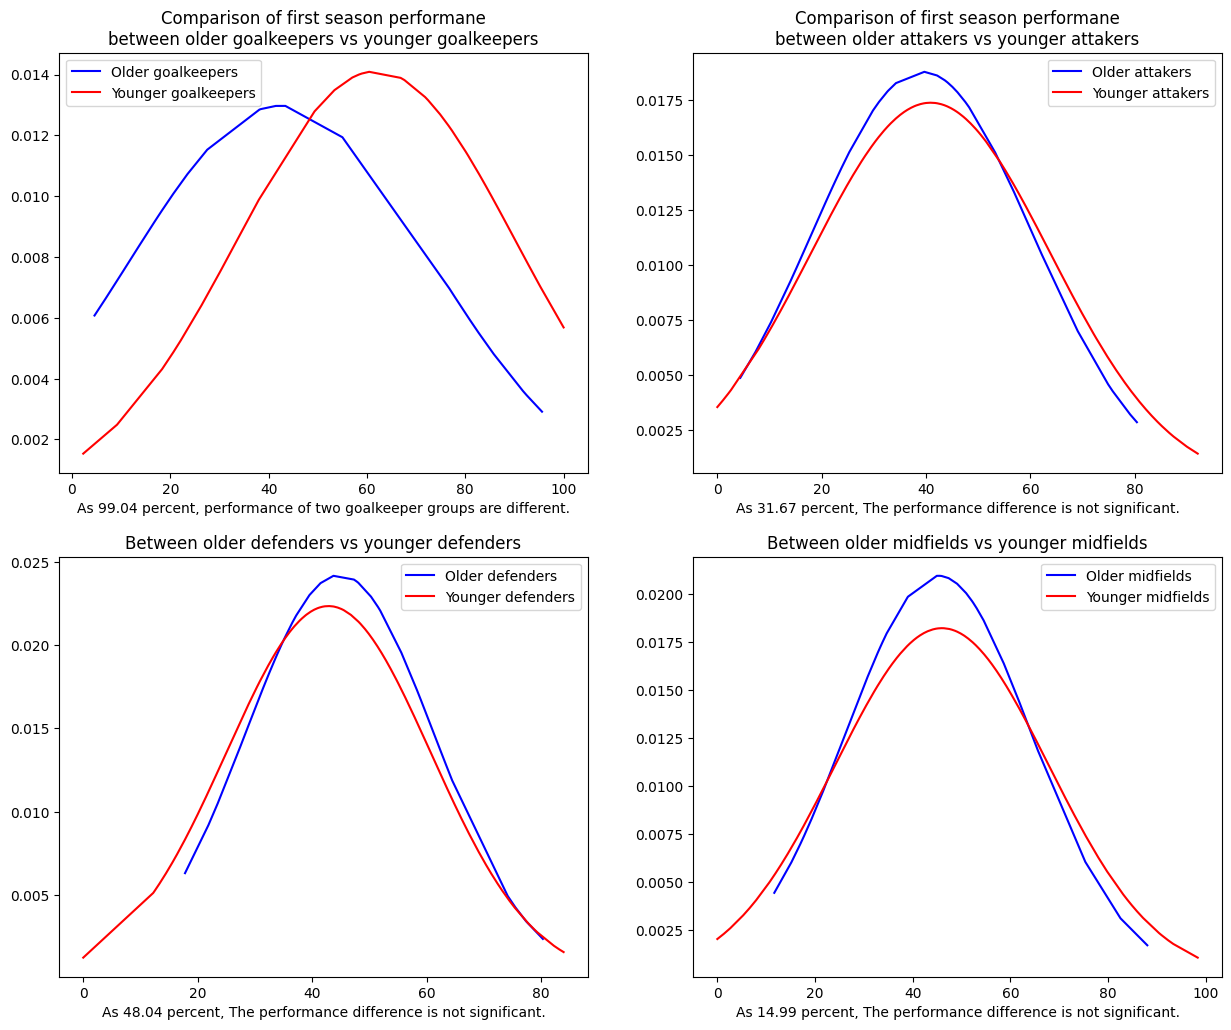

In [80]:
fig4, ax4 = plt.subplots(2,2, figsize=(15,12))

p1 = stats.norm.pdf(group1_gk, np.mean(group1_gk), np.std(group1_gk))
p2 = stats.norm.pdf(group2_gk, np.mean(group2_gk), np.std(group2_gk))
ax4[0][0].plot(group1_gk, p1, 'b', label = 'Older goalkeepers')
ax4[0][0].plot(group2_gk, p2, 'r', label = 'Younger goalkeepers')
ax4[0][0].set_title('Comparison of first season performane\nbetween older goalkeepers vs younger goalkeepers')
ax4[0][0].legend()
ax4[0][0].set_xlabel('As '+ str(round(diff_ratio_gk,2)) +' percent, performance of two goalkeeper groups are different.')

p1 = stats.norm.pdf(group1_at, np.mean(group1_at), np.std(group1_at))
p2 = stats.norm.pdf(group2_at, np.mean(group2_at), np.std(group2_at))
ax4[0][1].plot(group1_at, p1, 'b', label = 'Older attakers')
ax4[0][1].plot(group2_at, p2, 'r', label = 'Younger attakers')
ax4[0][1].set_title('Comparison of first season performane\nbetween older attakers vs younger attakers')
ax4[0][1].legend()
ax4[0][1].set_xlabel('As '+ str(round(diff_ratio_at,2)) +' percent, The performance difference is not significant.')

p1 = stats.norm.pdf(group1_df, np.mean(group1_df), np.std(group1_df))
p2 = stats.norm.pdf(group2_df, np.mean(group2_df), np.std(group2_df))
ax4[1][0].plot(group1_df, p1, 'b', label = 'Older defenders')
ax4[1][0].plot(group2_df, p2, 'r', label = 'Younger defenders')
ax4[1][0].set_title('Between older defenders vs younger defenders')
ax4[1][0].legend()
ax4[1][0].set_xlabel('As '+ str(round(diff_ratio_df,2)) +' percent, The performance difference is not significant.')

p1 = stats.norm.pdf(group1_mf, np.mean(group1_mf), np.std(group1_mf))
p2 = stats.norm.pdf(group2_mf, np.mean(group2_mf), np.std(group2_mf))
ax4[1][1].plot(group1_mf, p1, 'b', label = 'Older midfields')
ax4[1][1].plot(group2_mf, p2, 'r', label = 'Younger midfields')
ax4[1][1].set_title('Between older midfields vs younger midfields')
ax4[1][1].legend()
ax4[1][1].set_xlabel('As '+ str(round(diff_ratio_mf,2)) +' percent, The performance difference is not significant.')

In [76]:
fig4.savefig('hypothesis1_secondary_result.png')

# Discuss the results

با توجه به نمودار توزیع نرمال برای دو گروه، و همچنین نتیجه تست آزمون تی-تست تفاوت معناداری بین دو گروه وجود ندارد

با این حال بررسی جزئی تر بر روی تفاوت عملکرد حداقل در فصل اول نشان دهنده این است که عملکرد دروازه بان ها با سن رابطه دارد. می توان اینطور تفسیر کرد که یک دروازه بان به چالاکی بسیاری نیاز دارد و افزایش سن می تواند در عملکرد دروازه بان تاثیر داشته باشد.

تلاش شد متریک برای هر پوزیشن با توجه به اهدافی که آن گروه از پوزیشن ها دارند باشد. لذا می توان اینطور تفسیر کرد که در مورد اکثر پوزیشن ها در ارزیابی عملکرد بازیکنان حداقل در فصل اول نباید سن مورد توجه باشد